<h1> Onboarding Analysis
   <h3> User Segmentation<br>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [168]:
import warnings
warnings.filterwarnings('ignore')

<h2> Data Cleaning and Engineering

In [101]:
onboard= pd.read_csv('onboard_users2.csv')
onboard=onboard.drop(columns=['Unnamed: 0','date_account_created', 'timestamp_first_active','clusters'])
onboard.head(2)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,language1,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active,products
0,gxn3p5htnn,unknown,49.0,facebook,0,en,direct,direct,untracked,Web,...,5,2,4,6,2,3,8,2010,1970,Others
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,5,7,8,6,2,3,8,2011,1970,Others


In [102]:
onboard.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
age,207386,41,11,20,32,49,49,80
signup_flow,207386,3,7,0,0,0,0,25
target1,207386,3,0,0,3,4,4,4
gender1,207386,1,0,0,0,1,2,2
signup_method1,207386,0,0,0,0,0,1,2
language1,207386,5,2,0,5,5,5,24
affiliate_channel1,207386,2,1,0,2,2,5,7
affiliate_provider1,207386,5,2,0,4,4,8,17
first_affiliate_tracked1,207386,3,2,0,3,6,6,6
signup_app1,207386,2,0,0,2,2,2,3


In [103]:
onboard['products'].value_counts()

Others        120216
Product1       61067
Misc            9981
Product2        4899
Product3        2791
Product4        2295
Product5        2213
Product6        1391
Product7        1041
Product8         751
Product9         527
Product_10       214
Name: products, dtype: int64

In [104]:
onboard.shape

(207386, 26)

In [105]:
onboard.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1', 'year_account_created', 'year_first_active',
       'products'],
      dtype='object')

In [106]:
bins = np.array(onboard['age'])
names = ['20-30', '30-40', '40-50', '50-60', '60-70','70-80']
onboard['agerange'] = pd.cut(np.array(onboard['age']),6, labels=names)

In [107]:
onboard[['age','agerange']]

,age,agerange
0,49.0,40-50
1,38.0,30-40
2,56.0,50-60
3,42.0,40-50
4,41.0,40-50
...,...,...
207381,32.0,30-40
207382,49.0,40-50
207383,32.0,30-40
207384,49.0,40-50


<AxesSubplot:>

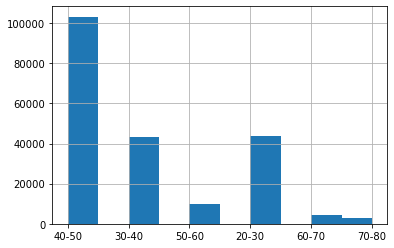

In [108]:
onboard.agerange.hist(bins=10)

<br>
<h3> Data Exploration

<h1> Language and Product Used
<br>

In [109]:
onboard['language'].unique()

array(['en', 'fr', 'de', 'es', 'pt', 'zh', 'ko', 'ja', 'it', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [110]:
language =pd.DataFrame(pd.crosstab(onboard['language'], onboard['products'])).reset_index(inplace=False)

In [111]:
language.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
products,,,,,,,,,,,,,,,,,,,,,
language,ca,cs,da,de,el,en,es,fi,fr,hr,...,ko,nl,no,pl,pt,ru,sv,th,tr,zh
Misc,0,2,2,18,1,9684,46,1,19,0,...,56,6,1,2,18,14,7,1,4,79
Others,3,23,39,451,18,115450,623,7,756,2,...,492,60,17,41,173,270,78,19,43,1084
Product1,2,6,14,187,2,59567,162,5,250,0,...,144,19,10,6,41,74,33,3,14,404
Product2,0,0,0,10,1,4760,18,1,67,0,...,12,3,0,1,0,5,0,0,1,13
Product3,0,0,1,6,0,2720,8,0,11,0,...,9,1,0,1,0,7,0,0,1,5
Product4,0,0,0,5,0,2255,6,0,12,0,...,3,0,2,0,0,1,0,0,0,5
Product5,0,1,2,7,2,2148,19,0,11,0,...,2,0,0,2,1,6,2,0,0,3
Product6,0,0,0,1,0,1375,0,0,7,0,...,2,0,0,0,0,1,0,0,0,2


In [13]:
language.columns

Index(['language', 'Misc', 'Others', 'Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10'],
      dtype='object', name='products')

In [14]:
language_pivot= pd.pivot_table(language, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'language',\
               aggfunc=np.sum, fill_value=0)

In [15]:
#https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

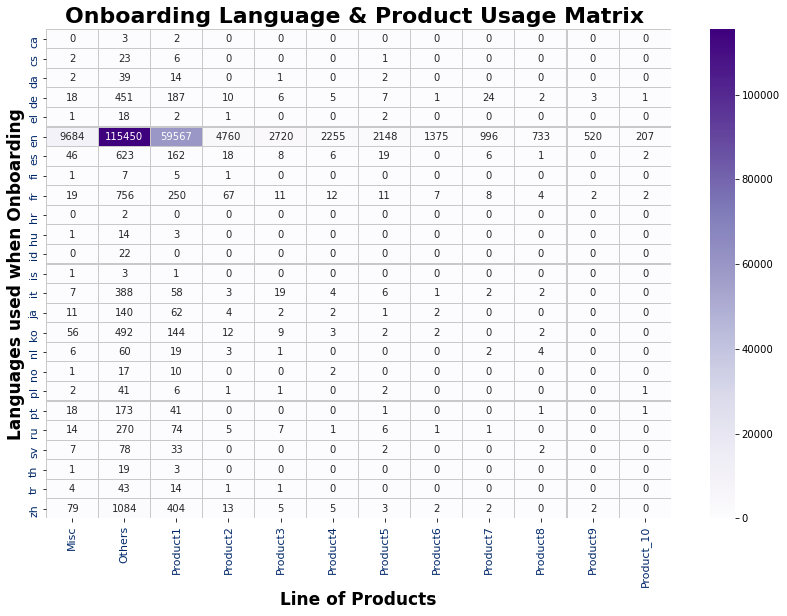

In [118]:
plt.figure(figsize=(14,9))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
#sns.heatmap(language_pivot, annot = True, fmt="d",linewidths=.1,\
            #cmap=cmap )
sns.heatmap(language_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='Purples',linecolor='#c9c9c9' )
plt.title('Onboarding Language & Product Usage Matrix ', fontsize=22,c='black',fontweight='bold')
plt.xlabel('Line of Products', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Languages used when Onboarding', fontsize=17,c='black',fontweight='bold')
plt.xticks(fontsize=11,rotation=90,color='#002869')
plt.yticks(fontsize=11,color='#002869')
plt.show()


<h2>Most Used Language when onboarding are:<h3> English, Chinese, German, French, Spanish<br>

In [134]:
language_pivot.sort_values(by='Product1',ascending=False).iloc[:,2:5][:5]

products,Product1,Product2,Product3
language,,,
en,59567,4760,2720
zh,404,13,5
fr,250,67,11
de,187,10,6
es,162,18,8


In [179]:
ln=language_pivot.sort_values(by='Product1',ascending=False).iloc[:,2:5][:5]

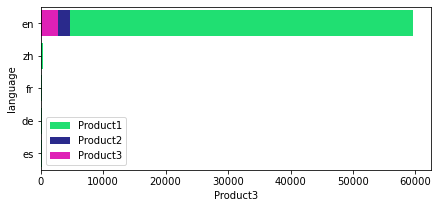

In [180]:
plt.figure(figsize=(7,3))
sns.barplot(ln.Product1,ln.index,color='#00ff6e',label='Product1')
sns.barplot(ln.Product2,ln.index,color='#1a1a9c',label='Product2')
sns.barplot(ln.Product3,ln.index,color='#ff00c8',label='Product3')
plt.legend()
plt.show()

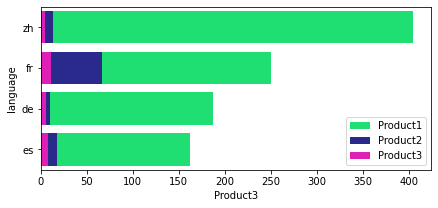

In [183]:
plt.figure(figsize=(7,3))
sns.barplot(ln[1:].Product1,ln[1:].index,color='#00ff6e',label='Product1')
sns.barplot(ln[1:].Product2,ln[1:].index,color='#1a1a9c',label='Product2')
sns.barplot(ln[1:].Product3,ln[1:].index,color='#ff00c8',label='Product3')
plt.legend()
plt.show()

<br><br><br><br>
<h1> Age Range and Product Used
   <br>

In [135]:
age = pd.DataFrame(pd.crosstab(onboard['agerange'], onboard['products'])).reset_index(inplace=False)
age.T

,0,1,2,3,4,5
products,,,,,,
agerange,20-30,30-40,40-50,50-60,60-70,70-80
Misc,2597,2873,3494,544,271,202
Others,19279,18291,74338,4777,2121,1410
Product1,17442,17940,19668,3333,1626,1058
Product2,1183,1318,1811,336,162,89
Product3,698,706,1060,171,89,67
Product4,560,595,809,181,94,56
Product5,684,613,716,104,62,34
Product6,335,410,493,91,40,22


In [136]:
age_pivot= pd.pivot_table(age, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'agerange',\
               aggfunc=np.sum, fill_value=0)

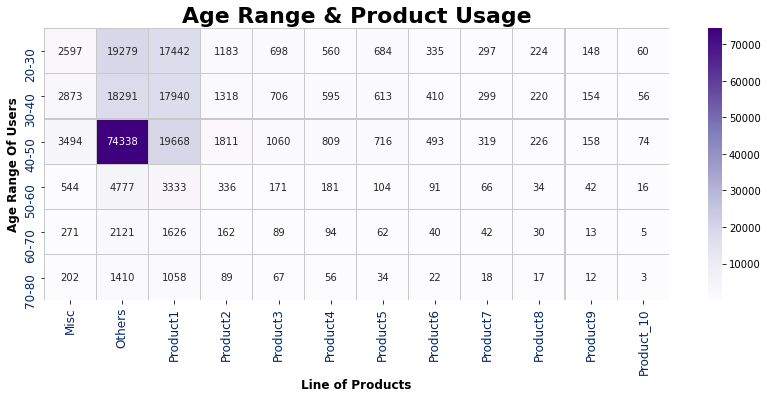

In [138]:
plt.figure(figsize=(14,5))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(age_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='Purples',linecolor='#c9c9c9')
plt.title('Age Range & Product Usage', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12,rotation=90,color='#002869')
plt.yticks(fontsize=12,color='#002869')
plt.xlabel('Line of Products', fontsize=12 ,c='black',fontweight='bold')
plt.ylabel('Age Range Of Users', fontsize=12,c='black',fontweight='bold')
plt.show()

In [158]:
age_pivot.sort_values(by='Product1',ascending=False).iloc[:,2:5][:5]

products,Product1,Product2,Product3
agerange,,,
40-50,19668,1811,1060
30-40,17940,1318,706
20-30,17442,1183,698
50-60,3333,336,171
60-70,1626,162,89


In [159]:
ap=age_pivot.sort_values(by='Product1',ascending=False).iloc[:,2:5][:5]

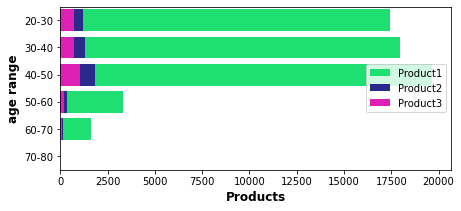

In [192]:
plt.figure(figsize=(7,3))
sns.barplot(ap.Product1,ap.index,color='#00ff6e',label='Product1')
sns.barplot(ap.Product2,ap.index,color='#1a1a9c',label='Product2')
sns.barplot(ap.Product3,ap.index,color='#ff00c8',label='Product3')
plt.xlabel('Products', fontsize=12 ,c='black',fontweight='bold')
plt.ylabel('age range', fontsize=12,c='black',fontweight='bold')
plt.legend()
plt.show()

<h2> How many users are Male or Female in the Age Groups

In [27]:
age_gender = pd.DataFrame(pd.crosstab(onboard['agerange'], onboard['gender'])).reset_index(inplace=False)
age_gender

gender,agerange,FEMALE,MALE,unknown
0,20-30,21497,16506,5504
1,30-40,19213,18485,5777
2,40-50,13363,11978,77825
3,50-60,4615,3652,1428
4,60-70,2170,1689,696
5,70-80,1120,1037,831


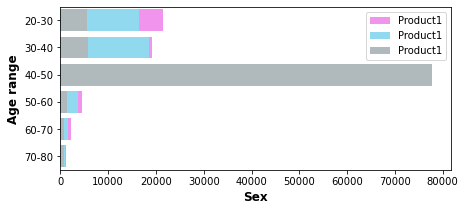

In [197]:
plt.figure(figsize=(7,3))
sns.barplot(age_gender.FEMALE,age_gender.agerange,color='#ff85fb',label='Product1')
sns.barplot(age_gender.MALE,age_gender.agerange,color='#80e1ff',label='Product1')
sns.barplot(age_gender.unknown,age_gender.agerange,color='#aebbbf',label='Product1')
plt.xlabel('Sex', fontsize=12 ,c='black',fontweight='bold')
plt.ylabel('Age range', fontsize=12,c='black',fontweight='bold')
plt.legend()
plt.show()

In [198]:
# in Age Group 40-50 there are wrong values

In [28]:
gender = pd.DataFrame(pd.crosstab(onboard['gender'], onboard['products'])).reset_index(inplace=False)
gender

products,gender,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,FEMALE,3148,30183,22540,1949,1086,877,849,452,357,254,205,78
1,MALE,3430,25820,19314,1320,697,677,670,471,415,276,188,69
2,unknown,3403,64213,19213,1630,1008,741,694,468,269,221,134,67


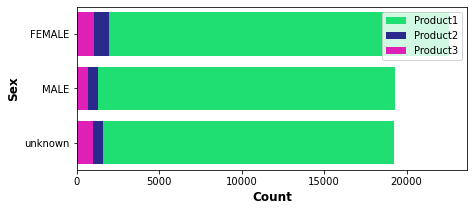

In [207]:
plt.figure(figsize=(7,3))
sns.barplot(gender.Product1,gender.gender,color='#00ff6e',label='Product1')
sns.barplot(gender.Product2,gender.gender,color='#1a1a9c',label='Product2')
sns.barplot(gender.Product3,gender.gender,color='#ff00c8',label='Product3')
plt.xlabel('Count', fontsize=12 ,c='black',fontweight='bold')
plt.ylabel('Sex', fontsize=12,c='black',fontweight='bold')
plt.legend()
plt.show()

<br><br>
<h2> Device used when Onboarding
   <br>

In [29]:
devicetype= pd.DataFrame(pd.crosstab(onboard['first_device_type'], onboard['products']))\
.reset_index(inplace=False)
devicetype_pivot= pd.pivot_table(devicetype, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'first_device_type',\
               aggfunc=np.sum, fill_value=0)

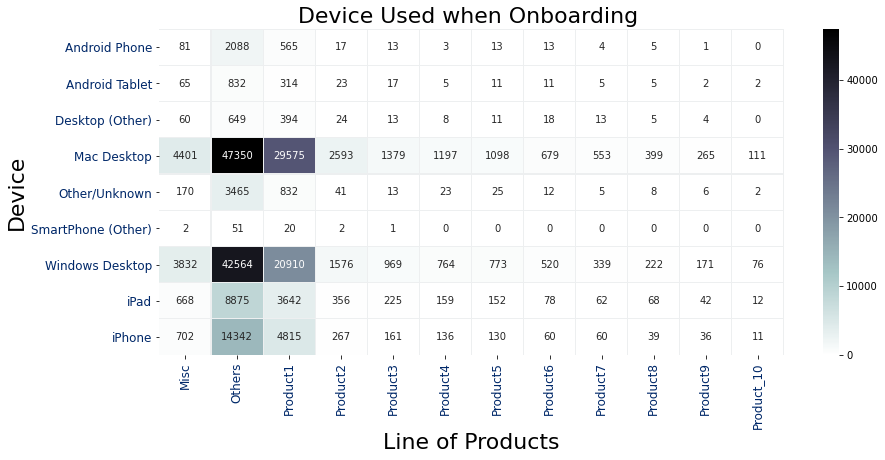

In [208]:
plt.figure(figsize=(14,6))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(devicetype_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Device Used when Onboarding ', fontsize=22,c='black')
plt.xticks(fontsize=12,rotation=90,color='#002869')
plt.yticks(fontsize=12,color='#002869')
plt.xlabel('Line of Products', fontsize=22 ,c='black')
plt.ylabel('Device', fontsize=22,c='black')
plt.show()

In [209]:
signup_app = pd.DataFrame(pd.crosstab(onboard['signup_app'], onboard['products'])).reset_index(inplace=False)
signup_app

products,signup_app,Misc,Others,Product1,Product2,Product3,Product4,Product5,Product6,Product7,Product8,Product9,Product_10
0,Android,171,4156,936,26,21,16,25,15,9,8,3,2
1,Moweb,193,3668,1707,54,31,33,34,28,15,13,14,3
2,Web,8954,100016,54359,4599,2595,2131,2049,1289,976,691,478,197
3,iOS,663,12376,4065,220,144,115,105,59,41,39,32,12


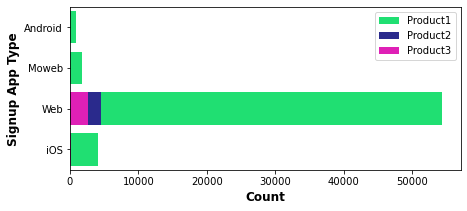

In [211]:
plt.figure(figsize=(7,3))
sns.barplot(signup_app.Product1,signup_app.signup_app,color='#00ff6e',label='Product1')
sns.barplot(signup_app.Product2,signup_app.signup_app,color='#1a1a9c',label='Product2')
sns.barplot(signup_app.Product3,signup_app.signup_app,color='#ff00c8',label='Product3')
plt.xlabel('Count', fontsize=12 ,c='black',fontweight='bold')
plt.ylabel('Signup App Type', fontsize=12,c='black',fontweight='bold')
plt.legend()
plt.show()

<br><br>
<h2> Affliate Channel of Site Traffic
    <br>

In [40]:
affiliate_channel = pd.DataFrame(pd.crosstab(onboard['affiliate_channel'], onboard['products'])).reset_index(inplace=False)
channel_pivot= pd.pivot_table(affiliate_channel, values=['Product1', 'Product2', 'Product3',
       'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9',
       'Product_10','Misc', 'Others'],\
               index = 'affiliate_channel',\
               aggfunc=np.sum, fill_value=0)

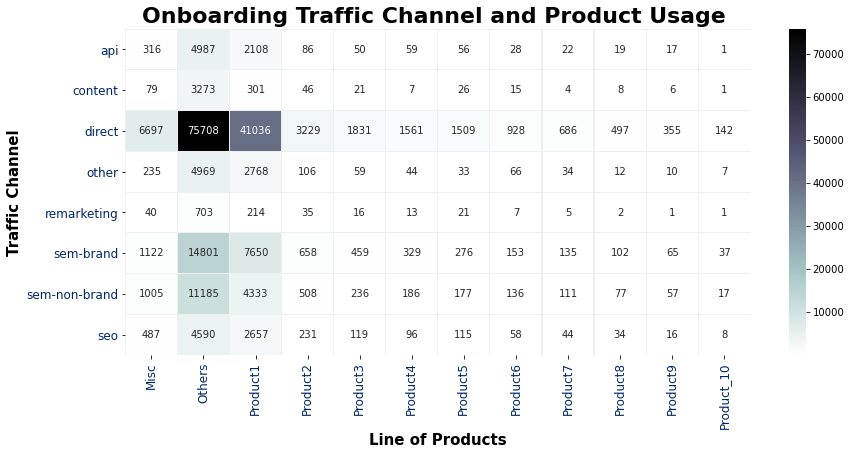

In [212]:
plt.figure(figsize=(14,6))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(channel_pivot, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('Onboarding Traffic Channel and Product Usage ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12,rotation=90,color='#002869')
plt.yticks(fontsize=12,color='#002869')
plt.xlabel('Line of Products', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Traffic Channel', fontsize=15,c='black',fontweight='bold')
plt.show()

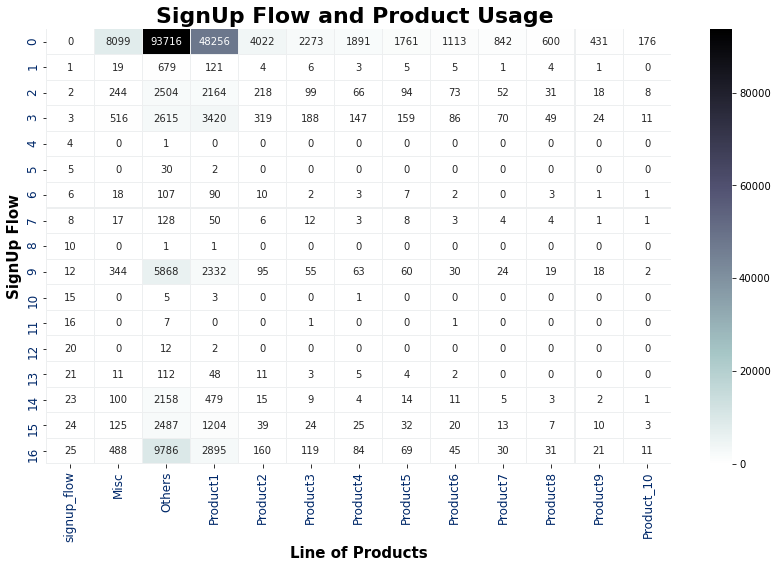

In [213]:
signup_flow =pd.DataFrame(pd.crosstab(onboard['signup_flow'], onboard['products'])).reset_index(inplace=False)
plt.figure(figsize=(14,8))
cmap = sns.diverging_palette(250, 155, s=70, l=40,n=9, center="dark")
sns.heatmap(signup_flow, annot = True, fmt="d",linewidths=.1,\
            cmap='bone_r',linecolor='#edeff0' )
plt.title('SignUp Flow and Product Usage ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12,rotation=90,color='#002869')
plt.yticks(fontsize=12,color='#002869')
plt.xlabel('Line of Products', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('SignUp Flow', fontsize=15,c='black',fontweight='bold')
plt.show()

<Figure size 432x288 with 0 Axes>

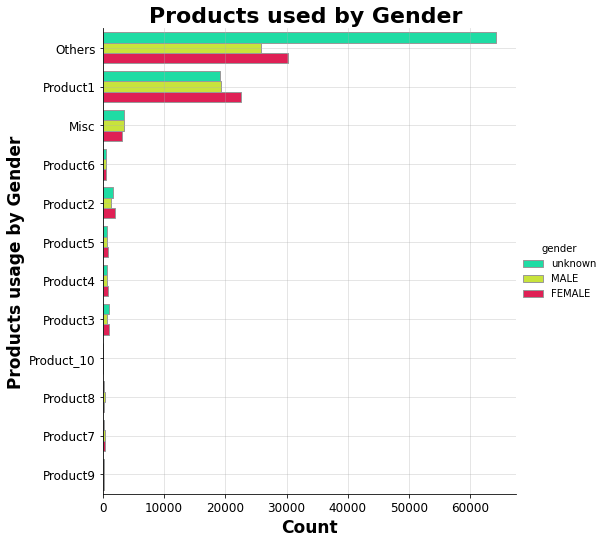

In [224]:
plt.figure(figsize=(6,4))
sns.catplot(y="products", hue="gender", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard,height=7, aspect=1)
plt.title('Products used by Gender ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Products usage by Gender', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

<Figure size 432x288 with 0 Axes>

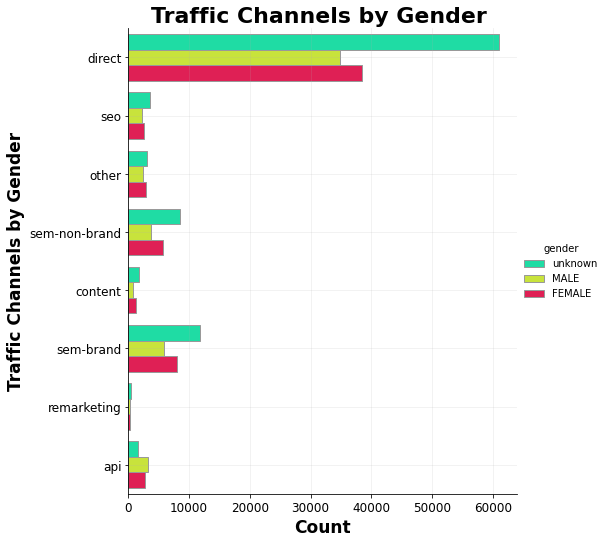

In [225]:
plt.figure(figsize=(6,4))
sns.catplot(y="affiliate_channel", hue="gender", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard,height=7, aspect=1)
plt.title('Traffic Channels by Gender ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Traffic Channels by Gender', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

<Figure size 360x288 with 0 Axes>

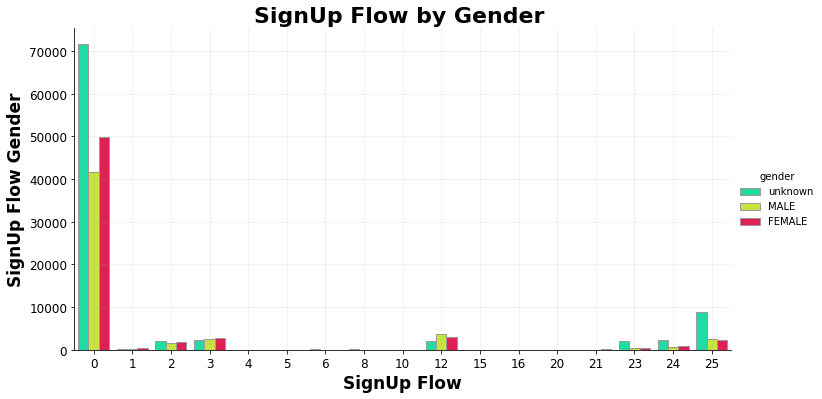

In [230]:
plt.figure(figsize=(5,4))
sns.catplot(x="signup_flow", hue="gender", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard,height=5, aspect=2)
plt.title('SignUp Flow by Gender ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('SignUp Flow', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('SignUp Flow Gender', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

<Figure size 432x288 with 0 Axes>

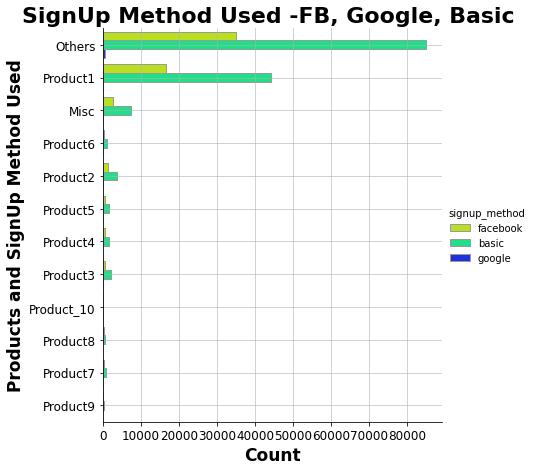

In [235]:
plt.figure(figsize=(6,4))
sns.catplot(y="products", hue="signup_method", kind="count",
            palette="gist_rainbow", edgecolor=".6",
            data=onboard,height=6, aspect=1)
plt.title('SignUp Method Used -FB, Google, Basic ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Products and SignUp Method Used', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.7)
plt.show()

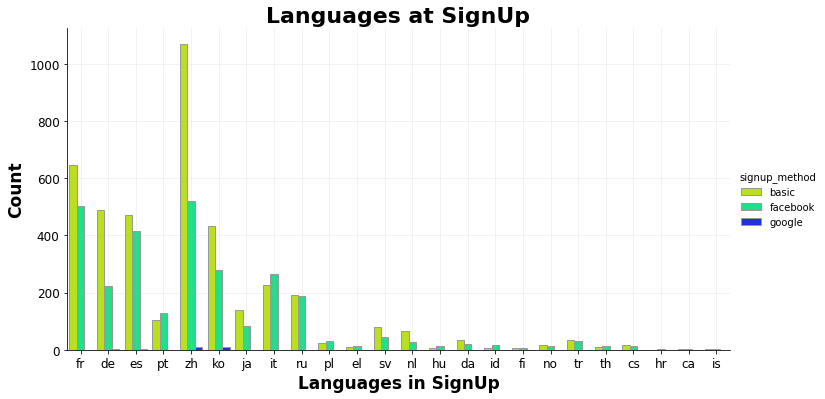

In [236]:
sns.catplot(x="language", hue="signup_method", kind="count",
            palette="gist_rainbow", edgecolor=".6",
            data=onboard.loc[onboard['language']!='en'],\
           height=5, aspect=2)
plt.title('Languages at SignUp', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.xlabel('Languages in SignUp', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

<Figure size 360x288 with 0 Axes>

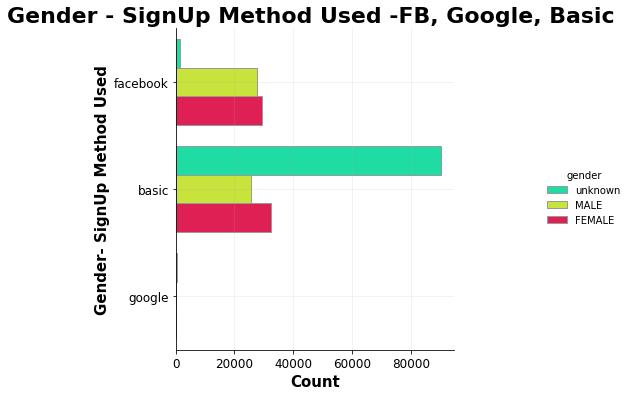

In [237]:
plt.figure(figsize=(5,4))
sns.catplot(y="signup_method", hue="gender", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard)
plt.title('Gender - SignUp Method Used -FB, Google, Basic ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Gender- SignUp Method Used', fontsize=15,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

<Figure size 360x288 with 0 Axes>

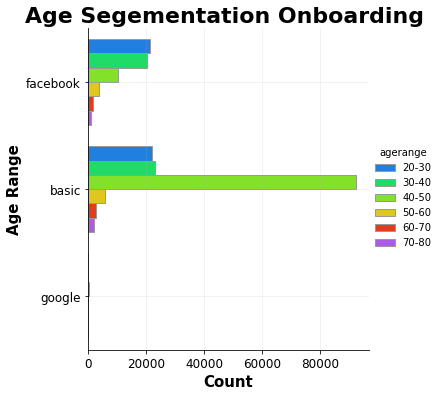

In [238]:
plt.figure(figsize=(5,4))
sns.catplot(y="signup_method", hue="agerange", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard,height=5, aspect=1)
plt.title('Age Segementation Onboarding ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Age Range', fontsize=15,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

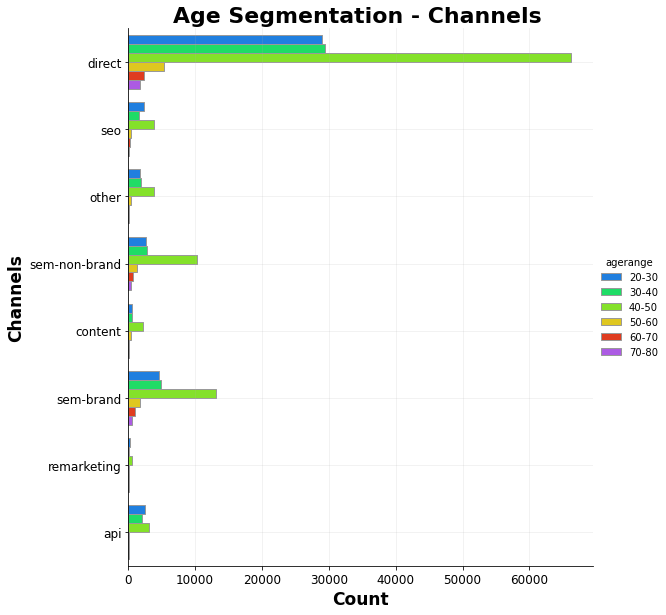

In [240]:
sns.catplot(y="affiliate_channel", hue="agerange", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard,height=8, aspect=1)

plt.title('Age Segmentation - Channels ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Channels', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

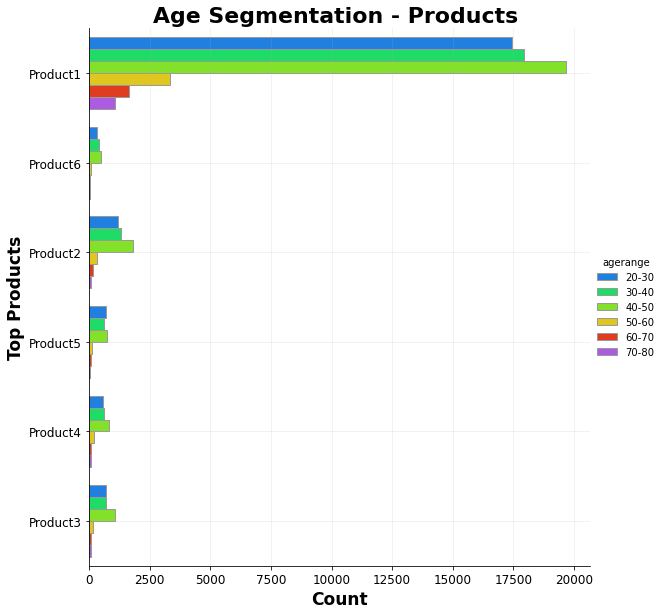

In [241]:
sns.catplot(y="products", hue="agerange", kind="count",
            palette="gist_ncar", edgecolor=".6",
            data=onboard.loc[(onboard['products']=='Product1')|(onboard['products']=='Product2')\
                            |(onboard['products']=='Product3')|(onboard['products']=='Product4')
                            |(onboard['products']=='Product5')|(onboard['products']=='Product6')
                            ],height=8, aspect=1
         )
plt.title('Age Segmentation - Products ', fontsize=22,c='black',fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count', fontsize=17 ,c='black',fontweight='bold')
plt.ylabel('Top Products', fontsize=17,c='black',fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

<br><br>
<h2> Clustering of Onboarding Data
<br>

In [242]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [243]:
#This is numerical encoded data

In [244]:
onboard2=pd.read_csv('clean_onboard')

In [245]:
onboard2= onboard2.drop(columns=['Unnamed: 0', 'id', 'date_account_created', 'timestamp_first_active',])

In [246]:
onboard2.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,signup_method1,language1,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active
0,unknown,49.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,5,2,4,6,2,3,8,2010,1970
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,1,5,7,8,6,2,3,8,2011,1970
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,0,5,2,4,6,2,6,21,2010,1970
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,1,5,2,4,6,2,3,17,2011,1970
4,unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,5,2,4,6,2,3,8,2010,1970


In [247]:
onboard2.shape

(207386, 24)

In [248]:
sample=onboard2.sample(frac=0.20, replace=True, random_state=1)

In [249]:
sample.shape

(41477, 24)

In [250]:
cat=[col for col in onboard2.columns if col not in onboard2.describe()]
num = [col for col in onboard2.columns if col in onboard2.describe()]

In [251]:
sample[num[:-2]].head(5)

,age,signup_flow,target1,gender1,signup_method1,language1,affiliate_channel1,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1
128037,30.0,0,10,1,1,5,5,8,3,2,6,8
5192,29.0,2,11,1,1,5,1,8,0,2,6,8
50057,49.0,0,7,2,0,5,2,4,6,2,8,0
109259,31.0,0,7,2,0,5,2,4,6,2,3,8
73349,33.0,0,10,2,0,5,2,4,6,2,3,17


In [252]:
#Using 40k records

In [253]:
sample[num].columns

Index(['age', 'signup_flow', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1', 'year_account_created', 'year_first_active'],
      dtype='object')

In [254]:
sample_c =sample[['age', 'signup_flow', 'target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1']]

In [255]:
from sklearn.preprocessing import normalize
scaled = normalize(sample_c)

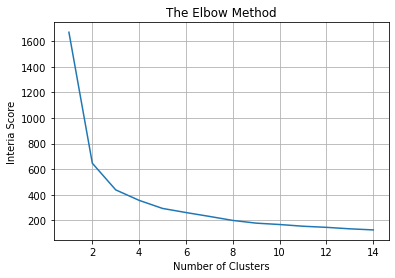

In [256]:
from sklearn.cluster import KMeans
interia_score=[]

for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=0,init='random')
    kmeans.fit(scaled)
    interia_score.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,15),interia_score)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Interia Score')
plt.grid()
plt.show()  

<h4> Best Silhoutte Score

In [257]:
for i in range(2,10,3):
    kmeans=KMeans(n_clusters=i,random_state=0,init='random')
    kmeans.fit(scaled)
    print('Number of Clusters',i)
    print(silhouette_score(scaled, kmeans.labels_))

Number of Clusters 2
0.7017629925085336
Number of Clusters 5
0.47788213212318453
Number of Clusters 8
0.3656497880845624


In [258]:
kmeans=KMeans(n_clusters=4,random_state=0,init='random')
kmeans.fit(scaled)

KMeans(init='random', n_clusters=4, random_state=0)

In [259]:
silhouette_score(scaled, kmeans.labels_)

0.47455322848907705

In [260]:
#get sample of same random_state of categorical data

In [261]:
onboard_sample =onboard.sample(frac=0.20, replace=True, random_state=1)

In [262]:
clusters=kmeans.labels_

In [263]:
cs=pd.Series(clusters)
cs.value_counts()

3    24439
1    11160
0     4533
2     1345
dtype: int64

In [264]:
#Copy index to cluster seier
onboard_sample.index=cs.index

In [265]:
onboard_sample['clusters2']=cs

In [266]:
onboard_sample.head(3)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,affiliate_provider1,first_affiliate_tracked1,signup_app1,first_device_type1,first_browser1,year_account_created,year_first_active,products,agerange,clusters2
0,cs674de37p,MALE,30.0,facebook,0,en,sem-brand,google,omg,Web,...,8,3,2,6,8,2013,1970,Product1,20-30,1
1,d00y28mqx9,MALE,29.0,facebook,2,en,content,google,linked,Web,...,8,0,2,6,8,2011,1970,Misc,20-30,1
2,njlt9ilmiw,unknown,49.0,basic,0,en,direct,direct,untracked,Web,...,4,6,2,8,0,2013,1970,Others,40-50,3


In [267]:
import random

In [306]:
columns_2=['target1', 'gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1']

<h2> Visualize Clusters

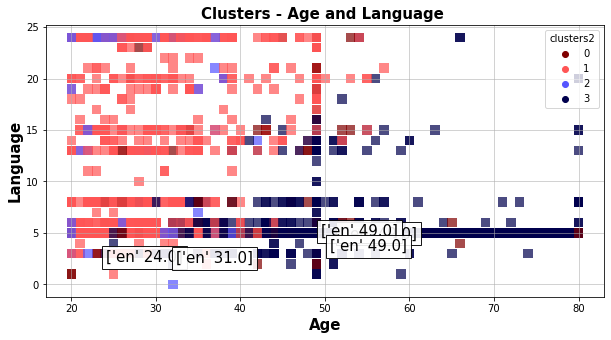

In [614]:
plt.figure(figsize=(10,5))
plt.title('Clusters - Age and Language ', fontsize=15,c='black',fontweight='bold')
plt.xlabel('Age', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Language', fontsize=15,c='black',fontweight='bold')

sns.scatterplot(onboard_sample.age,onboard_sample.language1,\
                hue=onboard_sample.clusters2,s=90, palette="seismic_r",\
                linewidth=0,alpha=0.7, marker='s')
plt.grid(alpha=0.7)


for s in range(0,20739,5000):
    i=random.randint(0,20739)
    plt.text(onboard_sample.age[i]+random.uniform(0,3), onboard_sample.language1[i]+random.uniform(0,-3),\
             str(onboard_sample[['language','age']].iloc[i].values), fontdict=dict(color="black",size=15),
         bbox=dict(facecolor="white",alpha=0.9))


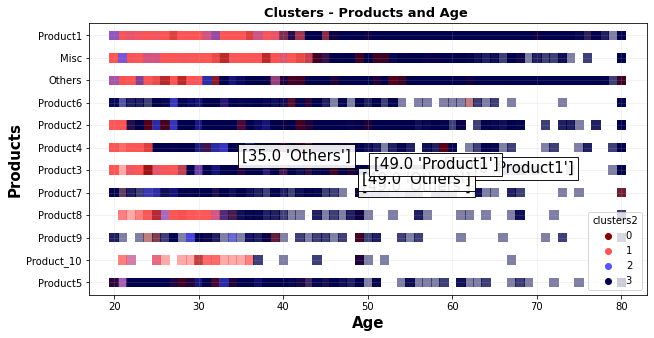

In [613]:
plt.figure(figsize=(10,5))
plt.title('Clusters - Products and Age ', fontsize=13,c='black',fontweight='bold')
plt.xlabel('Age', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Products', fontsize=15,c='black',fontweight='bold')

sns.scatterplot(onboard_sample.age,onboard_sample.products,hue=onboard_sample.clusters2,\
                s=90, palette="seismic_r",linewidth=0,alpha=0.5, marker='s')
plt.grid(alpha=0.2)

for s in range(0,20739,5000):
    i=random.randint(0,20739)
    plt.text(onboard_sample.age[i]+random.uniform(0,2), onboard_sample.language1[i]+random.uniform(0,2),\
             str(onboard_sample[['age','products']].iloc[i].values), fontdict=dict(color="black",size=15),
         bbox=dict(facecolor="white",alpha=0.9))

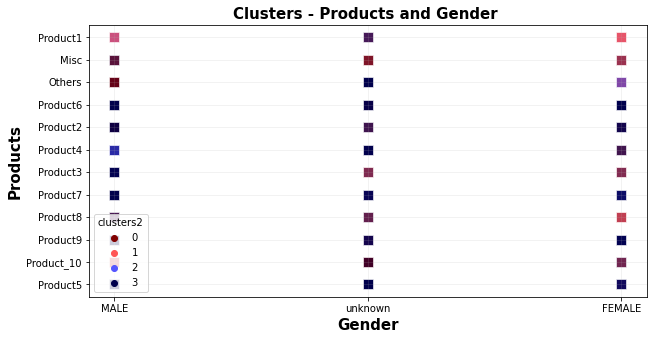

In [563]:
plt.figure(figsize=(10,5))
plt.title('Clusters - Products and Gender ', fontsize=15,c='black',fontweight='bold')
plt.xlabel('Gender', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Products', fontsize=15,c='black',fontweight='bold')

sns.scatterplot(onboard_sample.gender,onboard_sample.products,hue=onboard_sample.clusters2,\
                s=100, palette="seismic_r",linewidth=1,alpha=0.5, marker='s')
plt.grid(alpha=0.2)


In [497]:
c0=onboard_sample.loc[onboard_sample['clusters2']==0]
c1=onboard_sample.loc[onboard_sample['clusters2']==1]
c2=onboard_sample.loc[onboard_sample['clusters2']==2]
c3=onboard_sample.loc[onboard_sample['clusters2']==3]

In [498]:
cols_c=['gender', 'agerange', 'signup_method', 'signup_flow', 
       'affiliate_channel','signup_app','products']

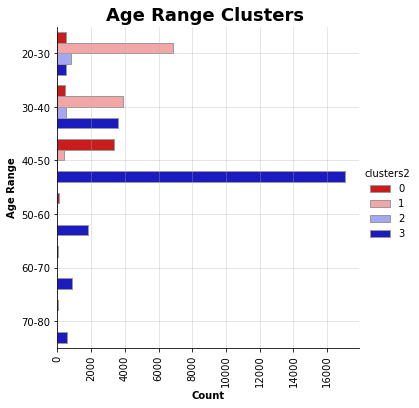

In [501]:
sns.catplot(y="agerange", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Age Range Clusters ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Age Range', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

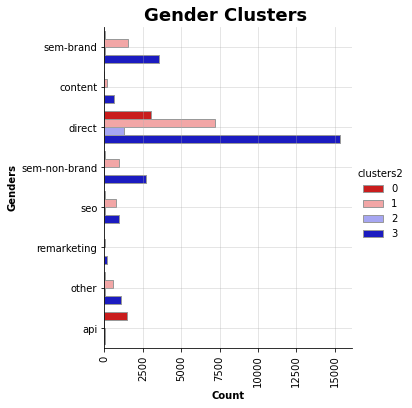

In [500]:
sns.catplot(y="affiliate_channel", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Gender Clusters ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Genders', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

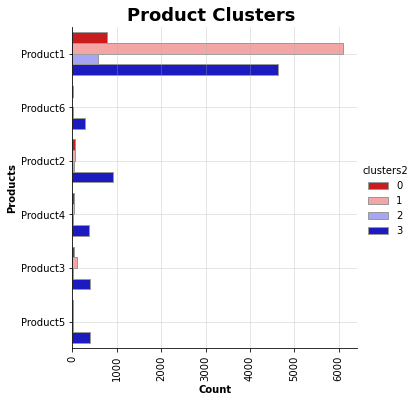

In [502]:
sns.catplot(y="products", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample.loc[(onboard_sample['products']=='Product1')|(onboard_sample['products']=='Product2')\
                            |(onboard_sample['products']=='Product3')|(onboard_sample['products']=='Product4')
                            |(onboard_sample['products']=='Product5')|(onboard_sample['products']=='Product6')
                            ])
plt.title('Product Clusters ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Products', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

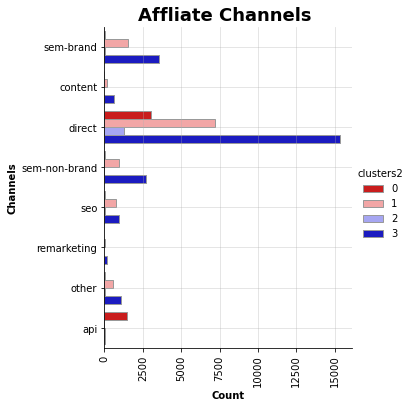

In [506]:
sns.catplot(y="affiliate_channel", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Affliate Channels ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Channels', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

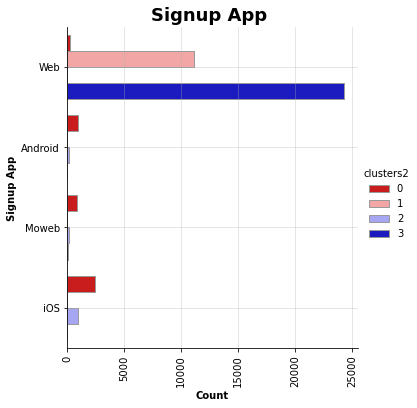

In [507]:
sns.catplot(y="signup_app", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Signup App ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Signup App', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

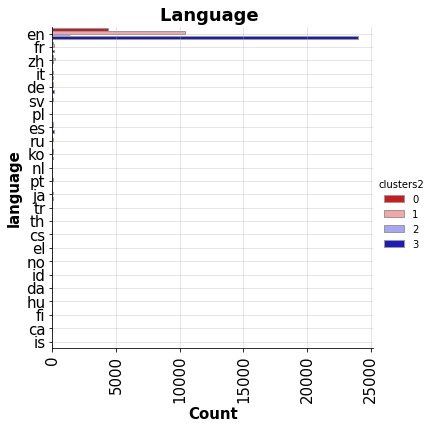

In [508]:
sns.catplot(y="language", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Language ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('language', fontsize=15,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

In [493]:
c0d=onboard_sample.loc[onboard_sample['clusters2']==0].describe().T.iloc[:-3,:][['mean','count']]
c1d=onboard_sample.loc[onboard_sample['clusters2']==1].describe().T.iloc[:-3,:][['mean','count']]
c2d=onboard_sample.loc[onboard_sample['clusters2']==2].describe().T.iloc[:-3,:][['mean','count']]
c3d=onboard_sample.loc[onboard_sample['clusters2']==3].describe().T.iloc[:-3,:][['mean','count']]

In [494]:
cluster_profile=pd.concat([c0d,c1d,c2d,c3d],axis=1)

In [495]:
cluster_profile.columns=['Cluster0','Count0','Cluster1','Count1','Cluster2','Count2','Cluster3','Count3']

In [519]:
cluster_profile

,Cluster0,Count0,Cluster1,Count1,Cluster2,Count2,Cluster3,Count3
age,44.961174,4533.0,29.781900,11160.0,29.088476,1345.0,47.721183,24439.0
signup_flow,19.663799,4533.0,0.228136,11160.0,24.242379,1345.0,0.223536,24439.0
target1,3.742555,4533.0,3.388351,11160.0,3.391078,1345.0,3.559843,24439.0
gender1,1.444297,4533.0,0.693011,11160.0,0.782900,1345.0,1.326977,24439.0
signup_method1,0.332892,4533.0,0.443907,11160.0,0.287732,1345.0,0.204918,24439.0
language1,5.298698,4533.0,5.750090,11160.0,5.577695,1345.0,5.051107,24439.0
affiliate_channel1,1.390911,4533.0,3.129570,11160.0,1.997026,1345.0,3.095176,24439.0
affiliate_provider1,6.639974,4533.0,5.398835,11160.0,4.209665,1345.0,5.441139,24439.0
first_affiliate_tracked1,5.237812,4533.0,3.822670,11160.0,5.329368,1345.0,3.747657,24439.0
signup_app1,1.949702,4533.0,1.998208,11160.0,2.341264,1345.0,1.996890,24439.0


In [549]:
print(24439.0/onboard_sample.shape[0]*100) ,print('Cluster 3 Propotion')
print(1345.0/onboard_sample.shape[0]*100) ,print('Cluster 2 Propotion')
print(11160.0/onboard_sample.shape[0]*100) ,print('Cluster 1 Propotion')
print(4533.0/onboard_sample.shape[0]*100) ,print('Cluster 0 Propotion')

58.92181208862743
Cluster 3 Propotion
3.242761048291824
Cluster 2 Propotion
26.906478289172313
Cluster 1 Propotion
10.928948573908432
Cluster 0 Propotion


(None, None)

<h1> Cluster Summary</h1>
   

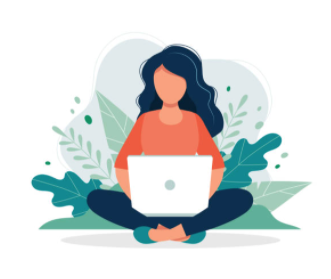

<center><h3>Cluster 0 - Middle Aged Techys </h3> Just 11 % of User Population, Mostly 40 years old, Mostly on iOS, Come from Direct and APi channels. Loyal to Product 1<br>

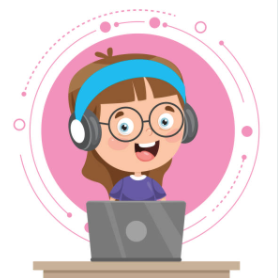

<center><h3>Cluster 1 - Adults who Love our Product # 1 </h3> 26% of User Population, 26- 30 years of age, English Speaking , Come from Web and Direct Channels. They are <b> Product 1 dominant population</b><br>

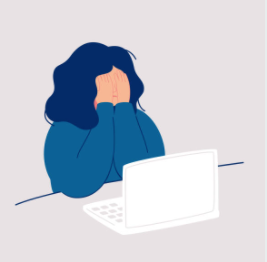

<center><h3>Cluster 2 - Adults who dont onboard </h3> Under 3 % of User Population, 30 years of age, iOS Users<br>

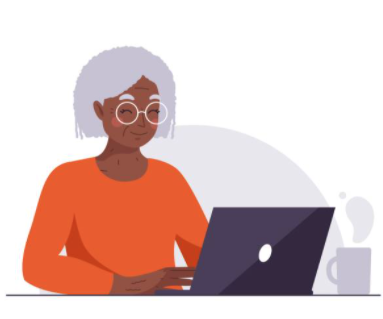

<center>
<h3>Cluster 3 - Older Majority Segment </h3> Biggest segment 58% of User Population, Mostly 45 years old,  English Speaking , Come from Web, Direct Channels, Semi Brnads and Brands, English speaking  <br>
    
<br><br>


<AxesSubplot:xlabel='mean'>

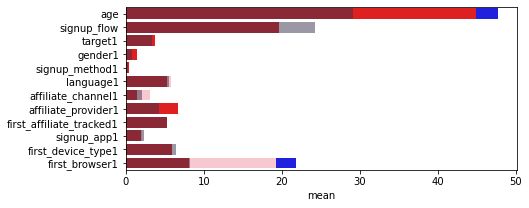

In [557]:
plt.figure(figsize=(7,3))
sns.barplot(c3.describe().T.iloc[:-3,:]['mean'],c3.describe().T.iloc[:-3,:].index,color='blue',alpha=1)
sns.barplot(c1.describe().T.iloc[:-3,:]['mean'],c1.describe().T.iloc[:-3,:].index,color='pink',alpha=1)
sns.barplot(c0.describe().T.iloc[:-3,:]['mean'],c0.describe().T.iloc[:-3,:].index,color='red',alpha=1)
sns.barplot(c2.describe().T.iloc[:-3,:]['mean'],c2.describe().T.iloc[:-3,:].index,color='#362c4f',alpha=.5)


In [531]:
cols_plot= ['age','gender1', 'signup_method1',
       'language1', 'affiliate_channel1', 'affiliate_provider1',
       'first_affiliate_tracked1', 'signup_app1', 'first_device_type1',
       'first_browser1', 'products', 'agerange', ]

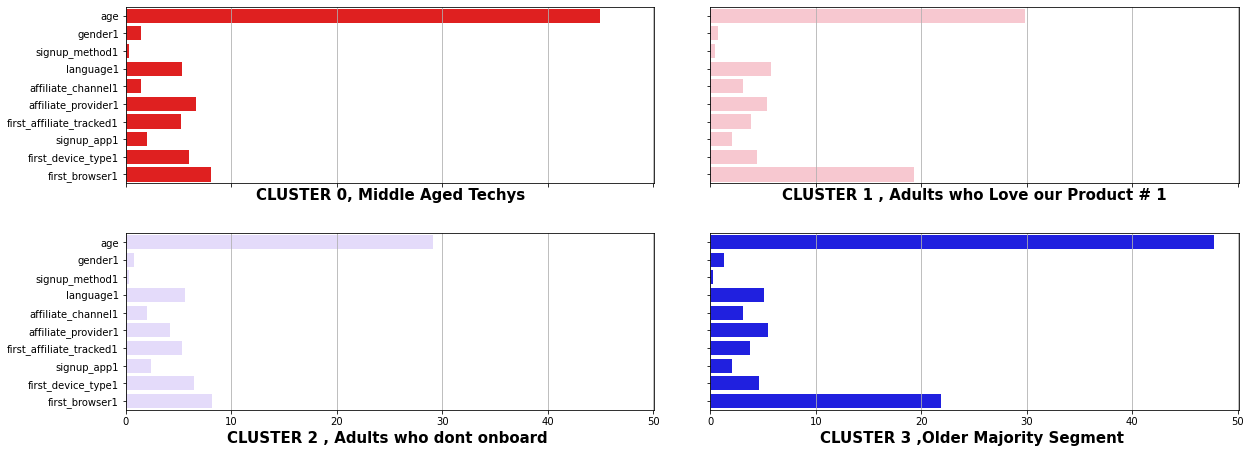

In [559]:
fig,axes=plt.subplots(2,2,sharey=True,sharex=True,figsize=(17, 7),)
fig.tight_layout(pad=4)
sns.barplot(c0[cols_plot].describe().T['mean'],c0[cols_plot].describe().T.index,color='red',ax=axes[0, 0])
axes[0, 0].set_xlabel('CLUSTER 0, Middle Aged Techys', fontsize=15,color='black',fontweight='bold')
axes[0, 0].grid(axis='x')

sns.barplot(c1[cols_plot].describe().T['mean'],c1[cols_plot].describe().T.index,color='pink',ax=axes[0, 1])
axes[0, 1].set_xlabel('CLUSTER 1 , Adults who Love our Product # 1', fontsize=15,color='black',fontweight='bold')
axes[0, 1].grid(axis='x')

sns.barplot(c2[cols_plot].describe().T['mean'],c2[cols_plot].describe().T.index,color='#e2d6ff',ax=axes[1, 0])
axes[1, 0].set_xlabel('CLUSTER 2 , Adults who dont onboard ', fontsize=15,color='black',fontweight='bold')
axes[1, 0].grid(axis='x')

sns.barplot(c3[cols_plot].describe().T['mean'],c3[cols_plot].describe().T.index,color='blue',ax=axes[1, 1])
axes[1, 1].set_xlabel('CLUSTER 3 ,Older Majority Segment ', fontsize=15,color='black',fontweight='bold')
axes[1, 1].grid(axis='x')


<h1>Interperate

In [573]:
interpretation=onboard_sample.copy()

In [574]:
interpretation['clusters2']= interpretation['clusters2'].replace({0:'Middle Aged Techys',1:'Adults who Love our Product # 1',\
                                     2:'Adults who dont onboard',\
                                    3:'Older Majority Segment',})

<h2> Visualize Clusters

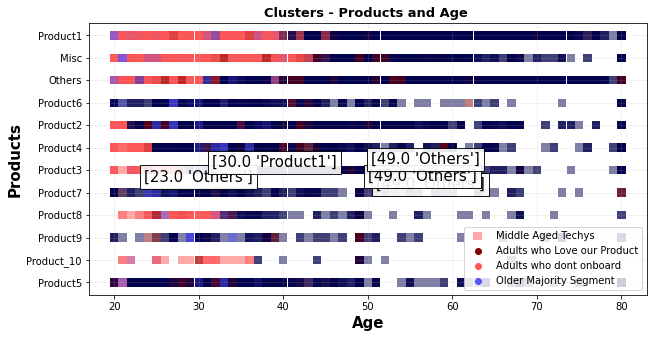

In [607]:
plt.figure(figsize=(10,5))
plt.title('Clusters - Products and Age ', fontsize=13,c='black',fontweight='bold')
plt.xlabel('Age', fontsize=15 ,c='black',fontweight='bold')
plt.ylabel('Products', fontsize=15,c='black',fontweight='bold')

sns.scatterplot(interpretation.age,interpretation.products,hue=onboard_sample.clusters2,\
                s=70, palette="seismic_r",linewidth=0,alpha=0.5, marker='s')
plt.grid(alpha=0.2)

for s in range(0,20739,5000):
    i=random.randint(0,20739)
    plt.text(interpretation.age[i]+random.uniform(0,2), interpretation.language1[i]+random.uniform(0,2),\
             str(interpretation[['age','products']].iloc[i].values), fontdict=dict(color="black",size=15),
         bbox=dict(facecolor="white",alpha=0.9))
    
plt.legend(['Middle Aged Techys', 'Adults who Love our Product',\
           'Adults who dont onboard','Older Majority Segment'
           ], loc='lower right')

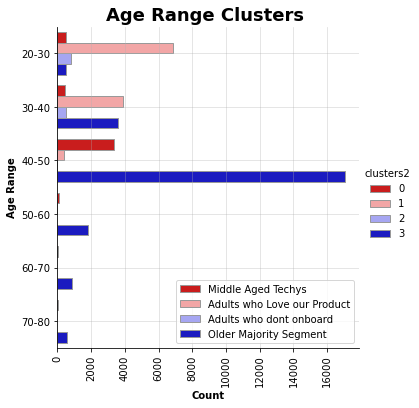

In [597]:
sns.catplot(y="agerange", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Age Range Clusters ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Age Range', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(['Middle Aged Techys', 'Adults who Love our Product',\
           'Adults who dont onboard','Older Majority Segment'
           ], loc='lower right')
plt.show()

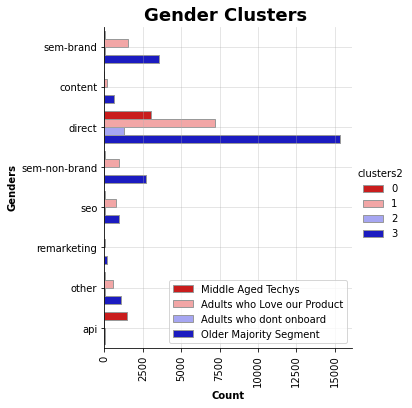

In [598]:
sns.catplot(y="affiliate_channel", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Gender Clusters ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.legend(['Middle Aged Techys', 'Adults who Love our Product',\
           'Adults who dont onboard','Older Majority Segment'
           ], loc='lower right')

plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Genders', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)
plt.show()

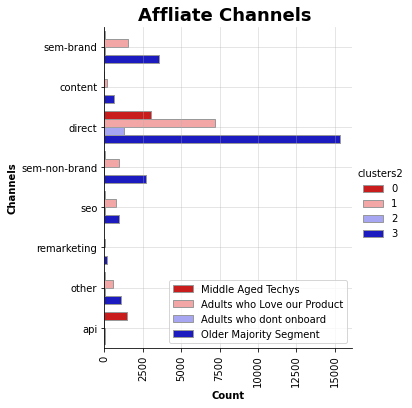

In [599]:
sns.catplot(y="affiliate_channel", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Affliate Channels ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Channels', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)

plt.legend(['Middle Aged Techys', 'Adults who Love our Product',\
           'Adults who dont onboard','Older Majority Segment'
           ], loc='lower right')

plt.show()

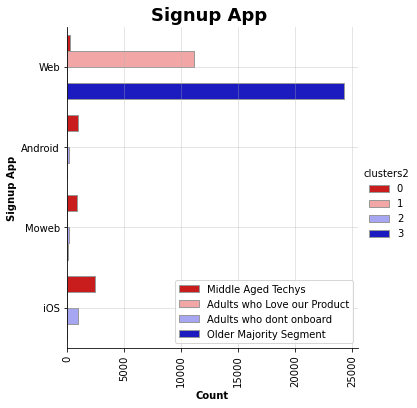

In [600]:
sns.catplot(y="signup_app", hue="clusters2", kind="count",
            palette="seismic_r", edgecolor=".6",
            data=onboard_sample)
plt.title('Signup App ', fontsize=18,c='black',fontweight='bold')
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Count', fontsize=10 ,c='black',fontweight='bold')
plt.ylabel('Signup App', fontsize=10,c='black',fontweight='bold')
plt.grid(alpha=0.4)

plt.legend(['Middle Aged Techys', 'Adults who Love our Product',\
           'Adults who dont onboard','Older Majority Segment'
           ], loc='lower right')

plt.show()